# k-Means Clustering on Mall Customer Segmentation Dataset
- toc: True
- categories: [Clustering]

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## EDA on Mall Customer Segmentation Dataset     

In [2]:
import os 
data_dir = '/media/siddy/D Drive/Datasets/'
print(os.listdir(data_dir))

['Clustering', 'song-popularity-prediction']


In [3]:
file_path = os.path.join(data_dir + 'Clustering', "Mall_Customers.csv")

In [4]:
print(file_path)

/media/siddy/D Drive/Datasets/Clustering/Mall_Customers.csv


In [5]:
#df = pd.read_csv('/media/siddy/D Drive/Datasets/Clustering/Mall_Customers.csv')
df = pd.read_csv(f'{file_path}')

In [6]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
# clustering on basis of annual income and spending score

features = df.iloc[:, [3,4]].values

In [17]:
features

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## WCSS - Within Cluster Sum of Squares

In [19]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters =  i, init = 'k-means++', random_state = 42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

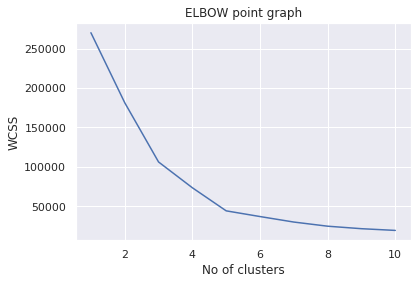

In [20]:
# plot an ELBOW Graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('ELBOW point graph')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

optimum number of clusters = 5

## k-Means Clustering

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=0)

#return a label for each datapoint based on their clusters
y = kmeans.fit_predict(features)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [22]:
len(y)

200

## Visualizing Clusters

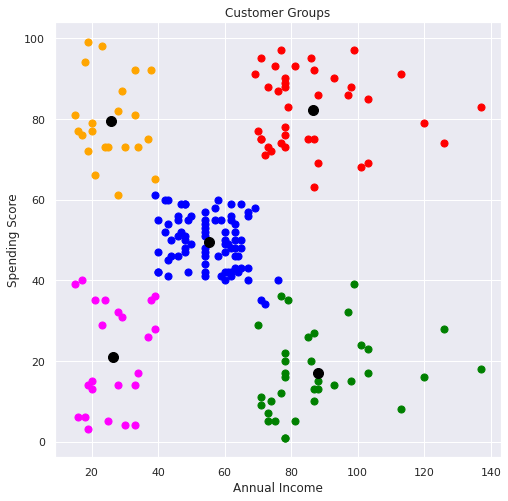

In [27]:
# plotting all the clusters and their centroids
plt.figure(figsize=(8,8))

# features[y==0(cluster no),0(column of features)], s= size of dot
plt.scatter(features[y==0,0], features[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(features[y==1,0], features[y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(features[y==2,0], features[y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(features[y==3,0], features[y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(features[y==4,0], features[y==4,1], s=50, c='magenta', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()